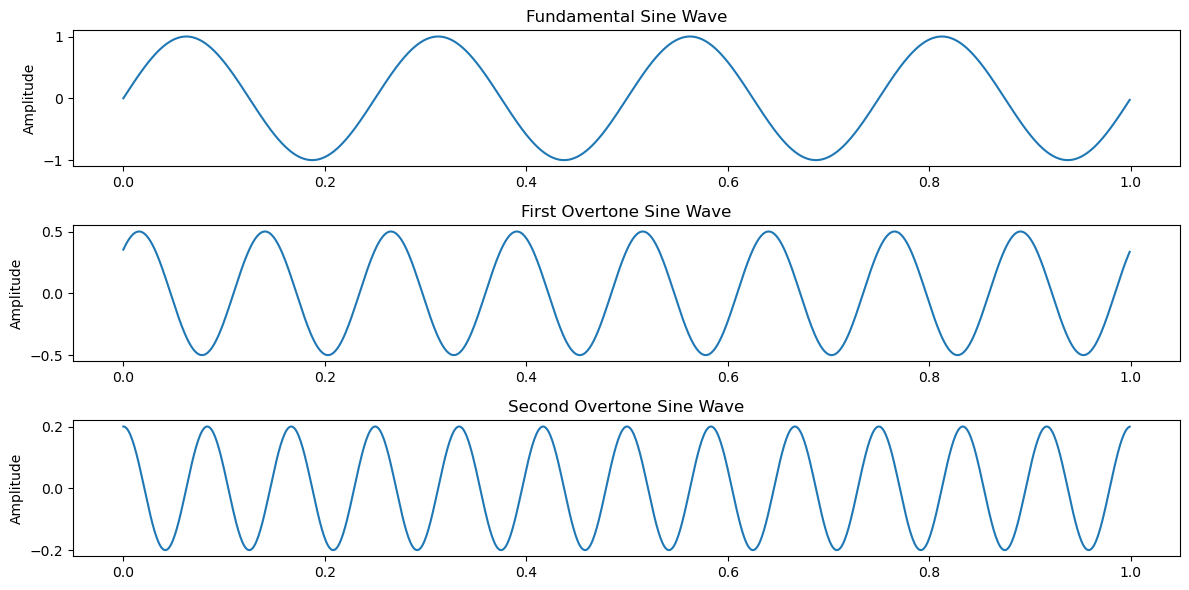

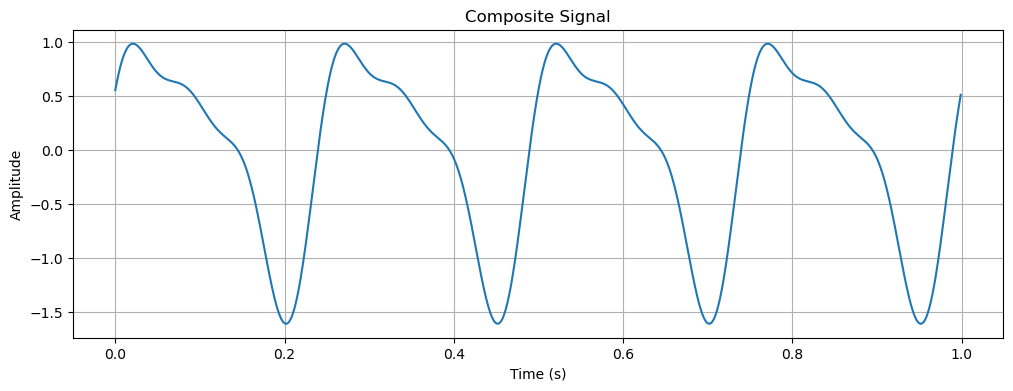

Fundamental Frequency: 4 Hz
Fundamental Phase: 0.0 radians
First Overtone Frequency: 8 Hz
First Overtobne Phase: 0.7853981633974483 radians
Second Overtone Frequency: 12 Hz
Second Overtone Phase: 1.5707963267948966 radians


In [36]:
# 1st Ques

import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the sine waves
sampling_rate = 1000
duration = 1.0 
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Time vector

# Define the fundamental frequency and its parameters
fundamental_frequency = 4  # Hz (A4)
fundamental_amplitude = 1.0
fundamental_phase = 0.0  # Radians

# Define the first overtone frequency and its parameters
first_overtone_frequency = 8  # Hz (A5)
first_overtone_amplitude = 0.5
first_overtone_phase = np.pi / 4  # 45 degrees in radians

# Define the second overtone frequency and its parameters
second_overtone_frequency = 12  # Hz (E6)
second_overtone_amplitude = 0.2
second_overtone_phase = np.pi / 2  # 90 degrees in radians

# Generate the individual sine waves
fundamental_wave = fundamental_amplitude * np.sin(2 * np.pi * fundamental_frequency * t + fundamental_phase)
first_overtone_wave = first_overtone_amplitude * np.sin(2 * np.pi * first_overtone_frequency * t + first_overtone_phase)
second_overtone_wave = second_overtone_amplitude * np.sin(2 * np.pi * second_overtone_frequency * t + second_overtone_phase)

# Create the composite signal by adding the individual waves
composite_signal = fundamental_wave + first_overtone_wave + second_overtone_wave

# Plot the individual sine waves
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title("Fundamental Sine Wave")
plt.ylabel('Amplitude')
plt.plot(t, fundamental_wave)

plt.subplot(3, 1, 2)
plt.title("First Overtone Sine Wave")
plt.ylabel('Amplitude')
plt.plot(t, first_overtone_wave)

plt.subplot(3, 1, 3)
plt.title("Second Overtone Sine Wave")
plt.ylabel('Amplitude')
plt.plot(t, second_overtone_wave)

plt.tight_layout()
plt.show()

# Plot the composite signal
plt.figure(figsize=(12, 4))
plt.title("Composite Signal")
plt.plot(t, composite_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Print the frequencies and phases of the input signals
print("Fundamental Frequency:", fundamental_frequency, "Hz")
print("Fundamental Phase:", fundamental_phase, "radians")
print("First Overtone Frequency:", first_overtone_frequency, "Hz")
print("First Overtobne Phase:", first_overtone_phase, "radians")
print("Second Overtone Frequency:", second_overtone_frequency, "Hz")
print("Second Overtone Phase:", second_overtone_phase, "radians")

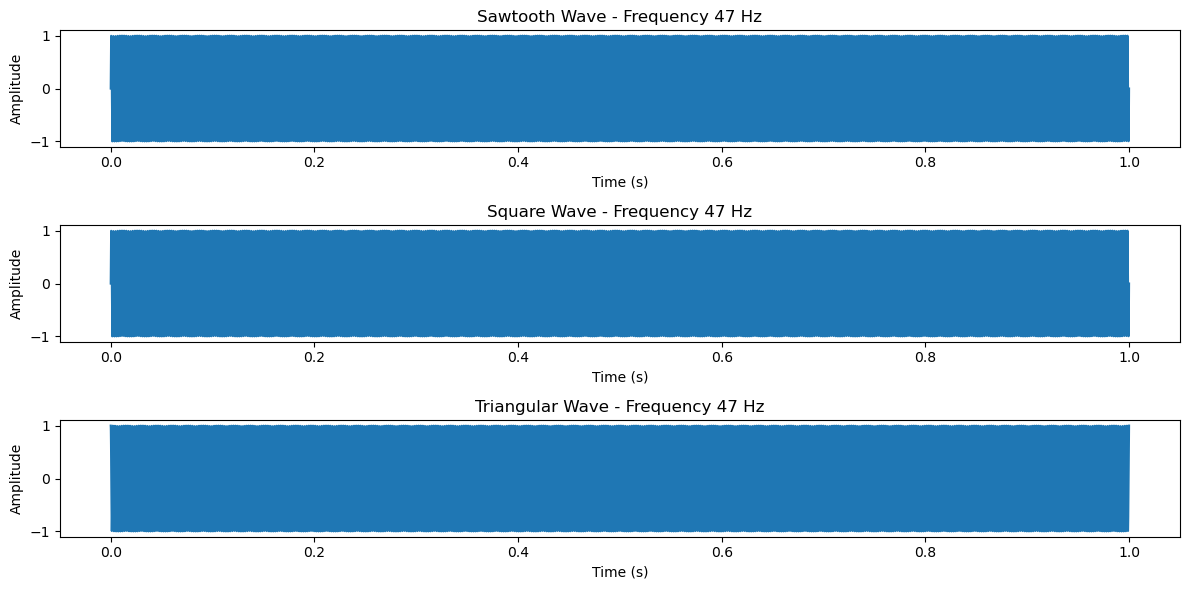

In [43]:
import numpy as np
import matplotlib.pyplot as plt

f = 473.0  # Fundamental frequency
A = 1.0   # Amplitude
n_max = 1 # Maximum number of overtones
T = 1.0   # Time in seconds
def sawtooth_wave(t):
    wave = 0.0
    for n in range(1, n_max + 1):
        wave += (A / n) * np.sin(2 * np.pi * n * f * t)
    return wave
def square_wave(t):
    wave = 0.0
    for n in range(1, n_max + 1):
        if n % 2 == 1:  # Odd harmonics
            wave += (A / n) * np.sin(2 * np.pi * n * f * t)
    return wave
def triangular_wave(t):
    wave = 0.0
    for n in range(1, n_max + 1):
        if n % 2 == 1:  # Odd harmonics
            wave += (A / (n**2)) * np.cos(2 * np.pi * n * f * t)
    return wave
# Generate time values
t = np.linspace(0, T, int(10000 * T))  # time vector

# Generate the waveforms
sawtooth = sawtooth_wave(t)
square = square_wave(t)
triangular = triangular_wave(t)

# Plot the waveforms
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, sawtooth)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sawtooth Wave - Frequency 47 Hz')

plt.subplot(3, 1, 2)
plt.plot(t, square)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Square Wave - Frequency 47 Hz')

plt.subplot(3, 1, 3)
plt.plot(t, triangular)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Triangular Wave - Frequency 47 Hz')

plt.tight_layout()
plt.show()

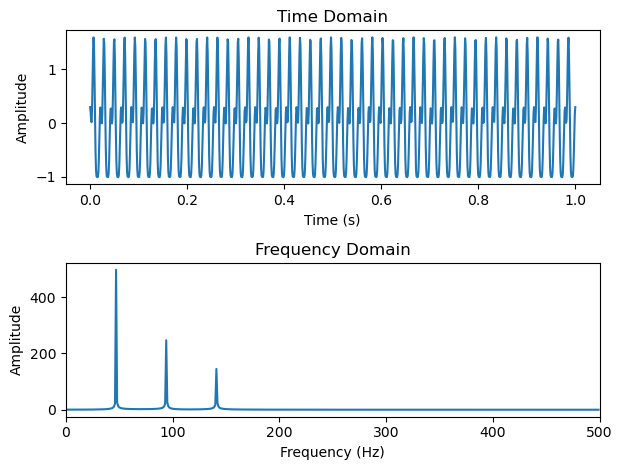

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the input waves
fun_freq = 47  # Fundamental frequency in Hz (e.g., A4)
ov_freqs = [fun_freq * 2, fun_freq * 3]  # Frequencies of ovs
waveform_rate = 1000  # Number of Waveform samples requried to create a discrete digital signal
duration = 1.0  # Duration of the signal in seconds

# Generate time values
t = np.linspace(0, duration, int(waveform_rate * duration))

# Generate input sine waves
fun_amplitude = 1.0
fun_phase = 0.0
fun_wave = fun_amplitude * np.sin(2 * np.pi * fun_freq * t + fun_phase)

ov_amplitudes = [0.5, 0.3]  # Vary the amplitudes as needed
ov_phases = [np.pi , np.pi / 2]  # Vary the phases as needed
ov_waves = []

for i, ov_freq in enumerate(ov_freqs):
    ov_amplitude = ov_amplitudes[i]
    ov_phase = ov_phases[i]
    ov_wave = ov_amplitude * np.sin(2 * np.pi * ov_freq * t + ov_phase)
    ov_waves.append(ov_wave)

# Combine all waves into the composite signal
signal = fun_wave + sum(ov_waves)
# Compute the Fourier transform
fourier_transform = np.fft.fft(signal)

# Calculate the frequency axis for plotting
frequencies = np.fft.fftfreq(len(signal), 1/waveform_rate)
positive_frequencies = frequencies[:len(signal)//2]
magnitude_spectrum = np.abs(fourier_transform[:len(signal)//2])

# Plot the time-domain signal
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain')

# Plot the frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain')

# Adjust plot window
plt.xlim([0, waveform_rate/2])

# Show both plots
plt.tight_layout()
plt.show()